<a href="https://colab.research.google.com/github/stevecwb/Termodinamica-2/blob/main/Lista%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

In [61]:
def margules(x2,A,B):
  R = 8.314
  T = 10 + 273.15
  y = ((A+3*B)*(x2**2))/(R*T) - ((4*B)*(x2**3))/(R*T)
  return y

def margules1(x1,A,B):
  R = 8.314
  T = 10 + 273.15
  y = ((A-3*B)*(x1**2))/(R*T) + ((4*B)*(x1**3))/(R*T)
  return y

def antoine(T,A,B,C):
  P_sat = 100000*(10**(A-((B)/(T+C))))
  return P_sat

In [62]:
dados = [[0.00001, 0.00001, 6344],[0.0610, 0.0953, 6590],[0.2149, 0.2710, 6980], [0.3187, 0.3600, 7140], [0.4320, 0.4453, 7171], [0.5246, 0.5106, 7216], [0.6117, 0.5735, 7140], [0.7265, 0.6626, 6974], [0.8040, 0.7312, 6845], [0.8830, 0.8200, 6617], [0.8999, 0.8382, 6557], [0.99999, 0.99999, 6073]]

P_sat1 = antoine(283.15,4.01814,1203.835,-53.226)
P_sat2 = antoine(283.15,3.96988,1203.526,-50.287)


df = pd.DataFrame(dados, columns = ['x1', 'y1', 'P (Pa)'])

df['x2'] = 1- df['x1']
df['y2'] = 1- df['y1']
df['ln gamma1'] = np.log((df['y1']*df['P (Pa)'])/(df['x1']*P_sat1))

display(df)

,x1,y1,P (Pa),x2,y2,ln gamma1
0,0.00001,0.00001,6344,0.99999,0.99999,0.046094
1,0.06100,0.09530,6590,0.93900,0.90470,0.530294
2,0.21490,0.27100,6980,0.78510,0.72900,0.373580
3,0.31870,0.36000,7140,0.68130,0.64000,0.286151
4,0.43200,0.44530,7171,0.56800,0.55470,0.198953
5,0.52460,0.51060,7216,0.47540,0.48940,0.147836
6,0.61170,0.57350,7140,0.38830,0.42650,0.099814
7,0.72650,0.66260,6974,0.27350,0.33740,0.048707
8,0.80400,0.73120,6845,0.19600,0.26880,0.027191
9,0.88300,0.82000,6617,0.11700,0.18000,0.014206


1297.828971206417 698.2277816989633


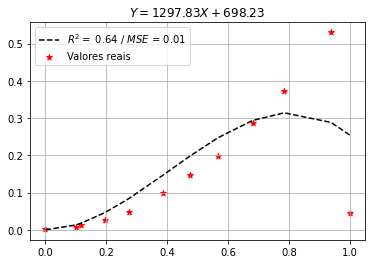

In [26]:
# Ajustar a função escolhida usando a função curve_fit da biblioteca scipy
X = df['x2']
Yn = df['ln gamma1']

[a,b], _= curve_fit(margules, X, Yn) # o _= serve para que a matriz não seja carregada numa variável

print(a,b)

# Realizar predição com o modelo de aprendizado de máquina
Y_pred = margules(X,a,b)

# Calcular as métricas para avaliar o ajuste do modelo aos dados
'''
As métricas utilizadas neste exemplo são o R^2 e o EQM
Estas métricas estão disponíveis na biblioteca sklearn
'''

r2 = r2_score(Yn, Y_pred)
mse = mean_squared_error(Yn, Y_pred)

# Gerar um gráfico do ajuste
plt.cla()
plt.plot(X, Y_pred, 'k--')
plt.scatter(X,Yn, c='r', marker='*')
plt.legend(['$R^2 =$ {:.2f} / $MSE$ = {:.2f}'.format(r2,mse),'Valores reais'])
plt.title('$Y = {:.2f}X + {:.2f}$'.format(a,b))
plt.grid()

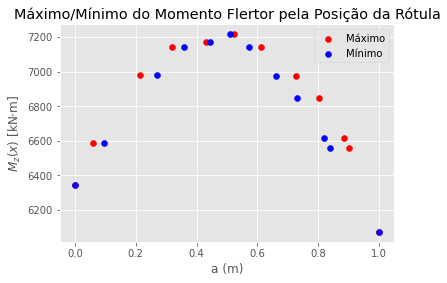

In [33]:
plt.style.use('ggplot')
plt.scatter(df['x1'],df['P (Pa)'], c='r', marker='o')
plt.scatter(df['y1'],df['P (Pa)'], c='b', marker='o')
plt.title('Máximo/Mínimo do Momento Flertor pela Posição da Rótula')
plt.ylabel('$M_z(x)$ [kN$\cdot$m]')
plt.xlabel('a (m)')
plt.legend(['Máximo','Mínimo'])

In [63]:
df['P_pred'] = df['x1']*np.exp(margules(df['x2'],a,b))*P_sat1 + df['x2']*np.exp(margules1(df['x1'],a,b))*P_sat2

display(df)

,x1,y1,P (Pa),x2,y2,ln gamma1,P_pred
0,0.00001,0.00001,6344,0.99999,0.99999,0.046094,6331.322795
1,0.06100,0.09530,6590,0.93900,0.90470,0.530294,6432.296908
2,0.21490,0.27100,6980,0.78510,0.72900,0.373580,6734.001948
3,0.31870,0.36000,7140,0.68130,0.64000,0.286151,6920.865523
4,0.43200,0.44530,7171,0.56800,0.55470,0.198953,7067.079999
5,0.52460,0.51060,7216,0.47540,0.48940,0.147836,7129.401804
6,0.61170,0.57350,7140,0.38830,0.42650,0.099814,7137.934870
7,0.72650,0.66260,6974,0.27350,0.33740,0.048707,7067.309339
8,0.80400,0.73120,6845,0.19600,0.26880,0.027191,6949.442966
9,0.88300,0.82000,6617,0.11700,0.18000,0.014206,6733.247628


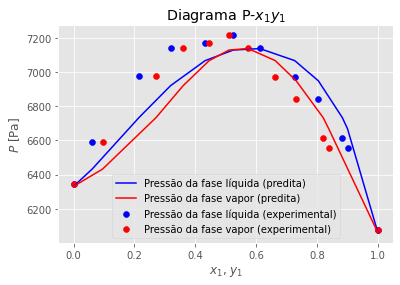

In [64]:
plt.style.use('ggplot')
plt.scatter(df['x1'],df['P (Pa)'], c='b', marker='o')
plt.scatter(df['y1'],df['P (Pa)'], c='r', marker='o')
plt.plot(df['x1'],df['P_pred'], c='b')
plt.plot(df['y1'],df['P_pred'], c='r')
plt.title('Diagrama P-$x_1y_1$')
plt.ylabel('$P$ [Pa]')
plt.xlabel('$x_1$, $y_1$')
plt.legend(['Pressão da fase líquida (predita)','Pressão da fase vapor (predita)','Pressão da fase líquida (experimental)','Pressão da fase vapor (experimental)'])

In [65]:
MSE = (sum(df['P (Pa)'] - df['P_pred'])**2)/12
print(MSE)

r2 = r2_score(df['P (Pa)'], df['P_pred'])
mse = mean_squared_error(df['P (Pa)'], df['P_pred'])

print(r2, mse)

14521.52155304585
0.8664344944672153 16467.70207657418
